In [ ]:
## Notebook env: brian_script_env (R kernel)
## this notebook finds variable genes necessary for miR_heterogeneity_nb.ipynb and Data_prepping.ipynb

In [66]:
library(Seurat)
library(SeuratDisk)
library(Matrix)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
assignments_CRISPRi = read.csv('/home/ssobti/projects/heterogeneity_brian/output_data/CRISPRi_CRISPRa_cell_culture_screen/geomux_output_assignments_CRISPRi.csv')

In [11]:
CRISPRi_screen = Read10X_h5('/home/ssobti/projects/heterogeneity_brian/data/032923_MD231_CRISPRi_CRISPRa_screen/230329_A01102_0587_AH3CY5DSX7_S4_200/cellranger/combined_G12/outs/count/filtered_feature_bc_matrix.h5')

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Genome matrix has multiple modalities, returning a list of matrices for this genome



In [80]:
CRISPRi_seurat = CreateSeuratObject(CRISPRi_screen[['Gene Expression']])

In [81]:
CRISPRi_seurat

An object of class Seurat 
36601 features across 15880 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

In [82]:
CRISPRi_seurat[,assignments_CRISPRi$barcode]

An object of class Seurat 
36601 features across 7691 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

In [83]:
CRISPRi_seurat = CRISPRi_seurat[,assignments_CRISPRi$barcode]

In [84]:
CRISPRi_seurat@meta.data = cbind(CRISPRi_seurat@meta.data, select(assignments_CRISPRi, -c('X', 'barcode')))

In [85]:
CRISPRi_seurat@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,guide,lor,pvalue,adj_pvalue,max_umi,n_umi,m_umi,v_umi,log_max_umi,log_n_umi,log_m_umi,umap_x,umap_y
,<fct>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCAAGAAACTCA-1,SeuratProject,42314,7947,NT-3i,11.3180388,7.065139e-322,2.823491e-316,694,694,18.7567568,13017.189189,2.8413595,2.8413595,1.27315775,4.410976,8.4536160
AAACCCAAGCTAGTTC-2,SeuratProject,33459,7269,NELFE-1i,2.1242059,2.386639e-118,9.537893e-113,90,116,3.1351351,233.675676,1.9542425,2.0644580,0.49625627,4.241770,2.0817325
AAACCCAAGCTATCCA-2,SeuratProject,31680,7596,MIS18A-1i,2.5152880,7.065139e-322,2.823491e-316,1224,1342,36.2702703,40650.702703,3.0877814,3.1277525,1.55955079,14.347571,0.7991447
AAACCCAAGTTCGGTT-2,SeuratProject,40249,7675,SUPV3L1-1i,3.1656430,7.065139e-322,2.823491e-316,493,697,18.8378378,6794.806306,2.6928469,2.8432328,1.27503105,8.931169,2.4968984
AAACCCACACCAGTAT-1,SeuratProject,36672,7142,NT-5i,2.7170255,2.513296e-305,1.004406e-299,429,681,18.4054054,5233.969970,2.6324573,2.8331471,1.26494539,10.465897,4.1350303
AAACCCACACGCAAAG-2,SeuratProject,39108,7435,CDK1-1i,1.3863681,1.311628e-238,5.241753e-233,141,191,5.1621622,594.306306,2.1492191,2.2810334,0.71283164,15.175779,12.0018310
AAACCCAGTATTAAGG-1,SeuratProject,24789,6413,ENY2-1i,1.3136201,7.752163e-312,3.098051e-306,297,685,18.5135135,3636.701201,2.4727564,2.8356906,1.26748885,13.411343,7.2369680
AAACCCATCGGTCATA-2,SeuratProject,52566,8093,ENY2-1i,8.0676628,7.065139e-322,2.823491e-316,33,33,0.8918919,29.432432,1.5185139,1.5185139,-0.04968778,13.540512,9.2492060
AAACGAAAGCCGCTTG-2,SeuratProject,27109,6071,VRK1-1i,1.5953415,7.198122e-311,2.876636e-305,375,551,14.8918919,4197.432432,2.5740313,2.7411516,1.17294987,6.161949,2.5631425


In [86]:
CRISPRi_seurat[["percent.mt"]] <- PercentageFeatureSet(CRISPRi_seurat, pattern = "^MT-")

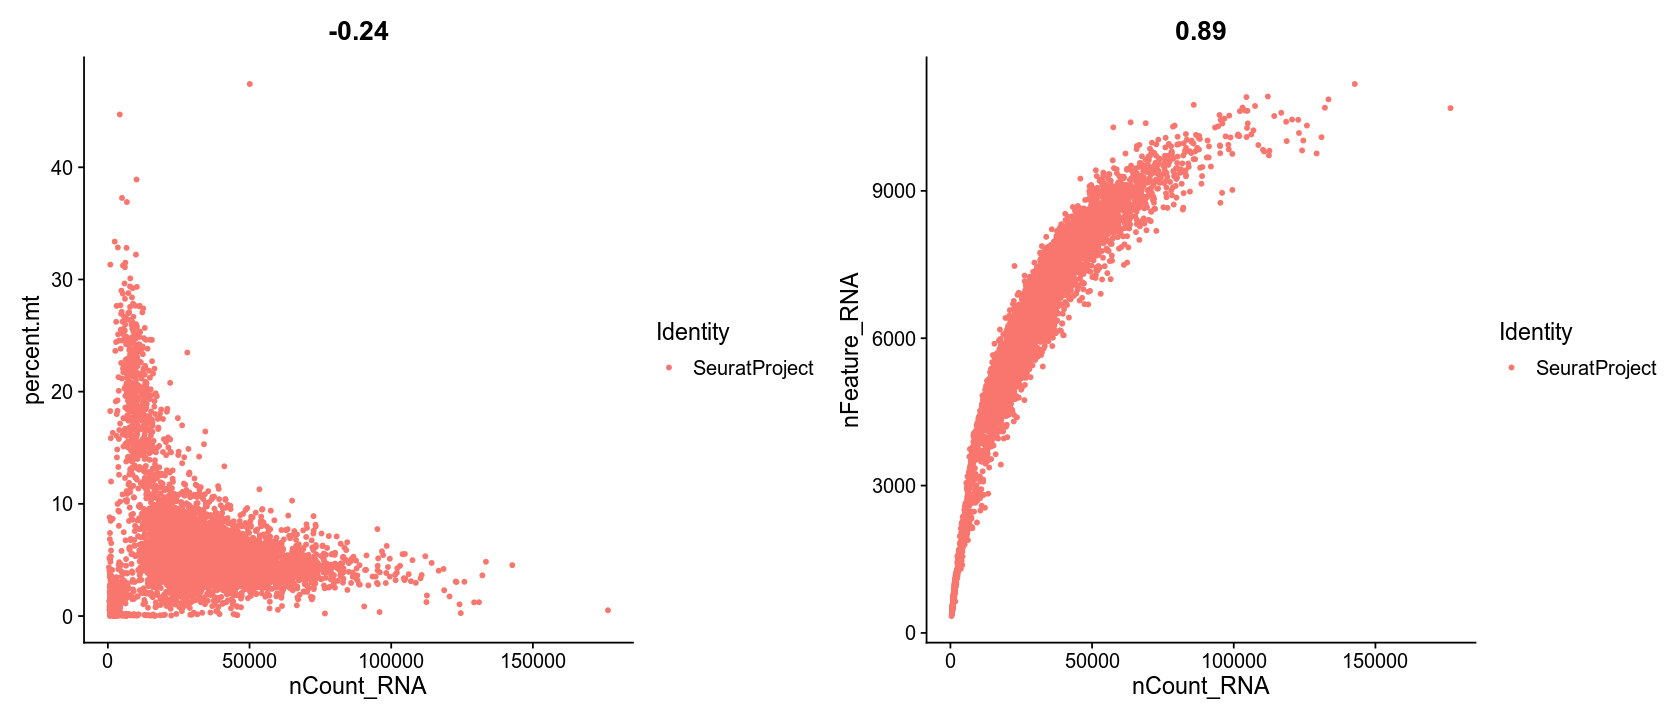

In [89]:
options(repr.plot.width=14, repr.plot.height=6)
plot1 <- FeatureScatter(CRISPRi_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(CRISPRi_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [90]:
CRISPRi_seurat <- subset(CRISPRi_seurat, subset = percent.mt < 12 & nFeature_RNA > 200 & nFeature_RNA < 9000)

In [91]:
CRISPRi_seurat <- NormalizeData(CRISPRi_seurat, normalization.method = "LogNormalize", scale.factor = 10000)

In [92]:
CRISPRi_seurat <- FindVariableFeatures(CRISPRi_seurat, selection.method = "vst", nfeatures = 2000)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”


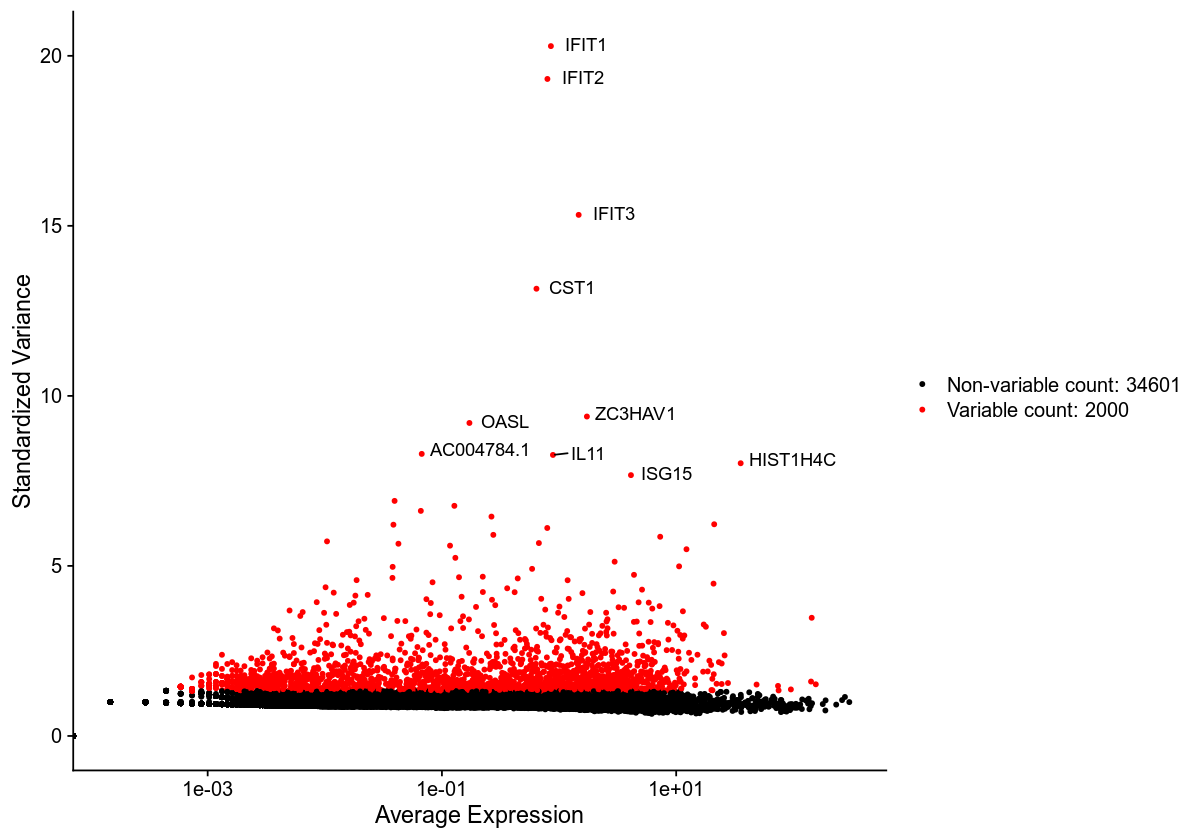

In [97]:
options(repr.plot.width=10, repr.plot.height=7)
VariableFeaturePlot(CRISPRi_seurat) -> plot1
top10 <- head(VariableFeatures(CRISPRi_seurat), 10)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

In [94]:
top_variable_genes = VariableFeatures(CRISPRi_seurat)

In [95]:
top_var_genes = data.frame(variable_genes = top_variable_genes)

In [98]:
write.csv(top_var_genes, file = '/home/ssobti/projects/heterogeneity_brian/output_data/CRISPRi_CRISPRa_cell_culture_screen/heterogeneity/top_var_genes.csv')

In [104]:
raw <- CRISPRi_seurat@assays$RNA@counts
raw <- as(raw, 'dgCMatrix')

In [105]:
class(raw)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [106]:
medians = sparseMatrixStats::rowMedians(raw)

In [107]:
median_df = data.frame(gene_medians = medians)

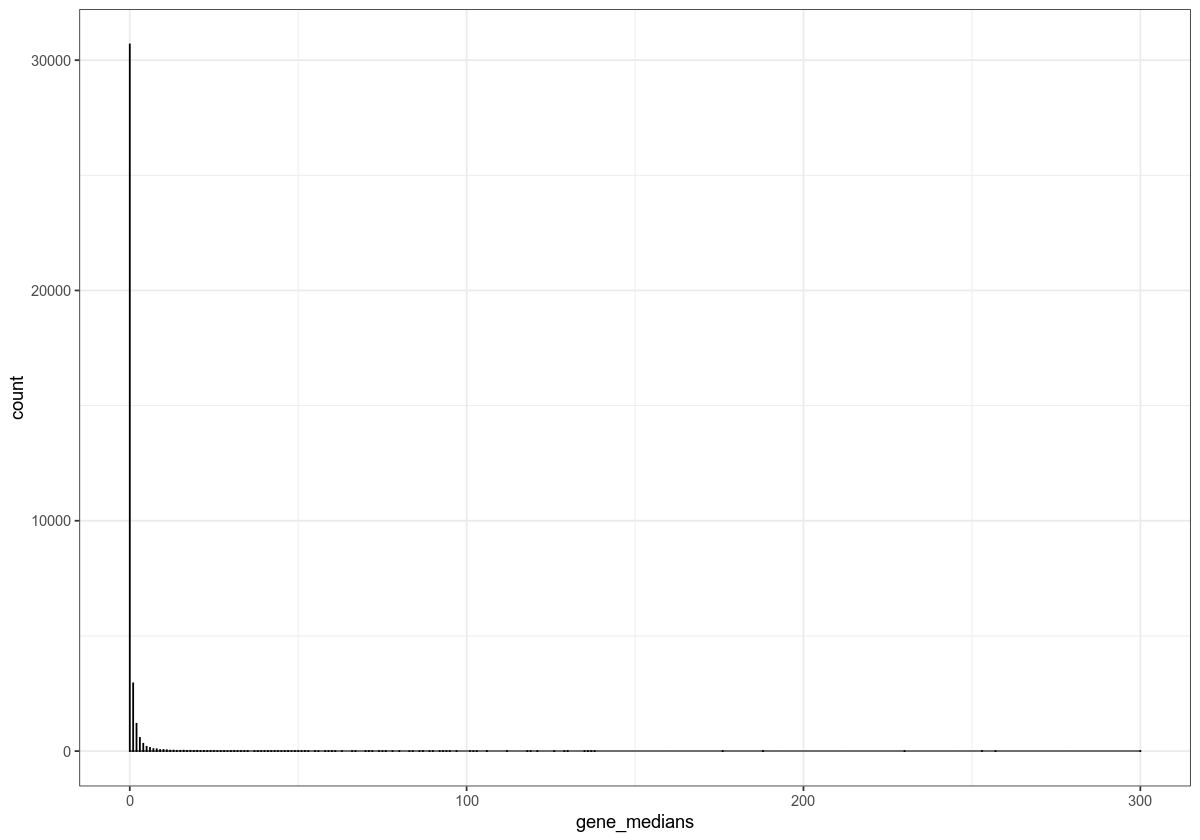

In [108]:
ggplot(median_df, aes(x=gene_medians)) + 
  geom_histogram(color="black", fill="white", bins = 50000) +
  theme_bw()

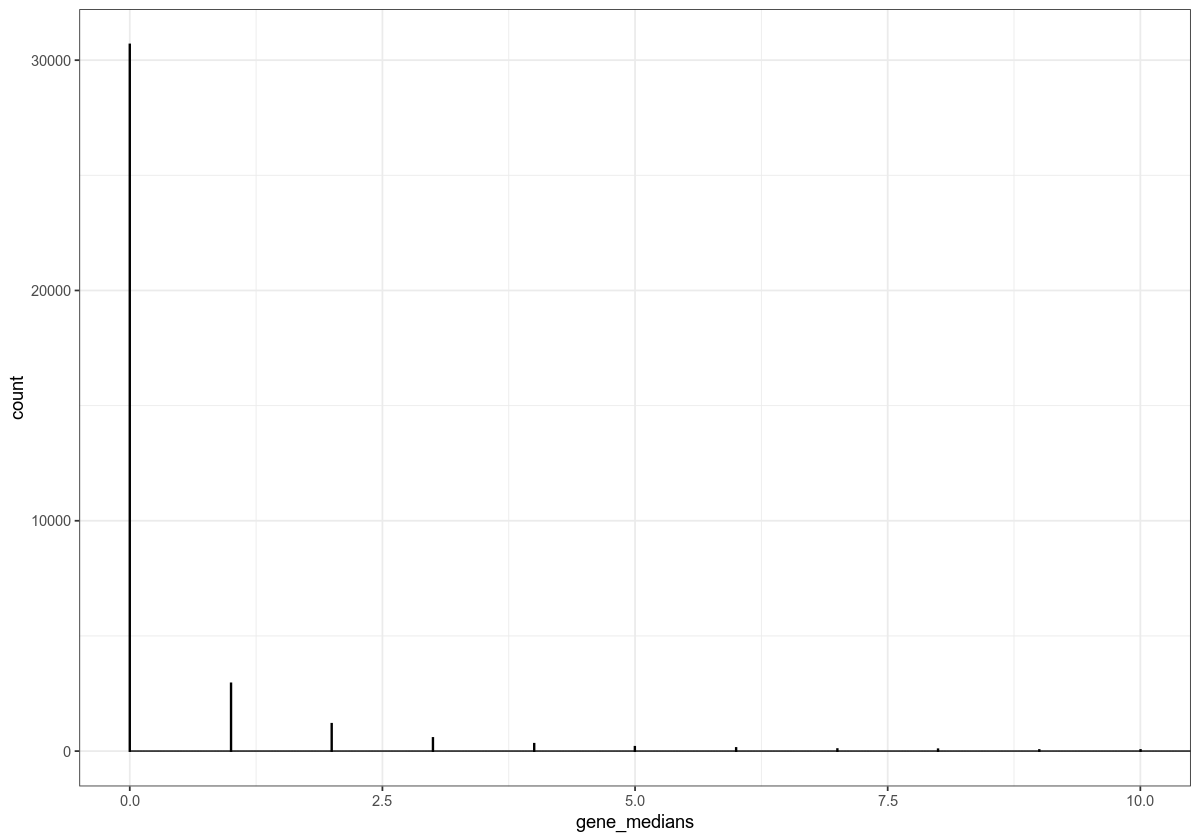

In [109]:
ggplot(median_df, aes(x=gene_medians)) + 
  geom_histogram(color="black", fill="white", bins = 50000) +
  coord_cartesian(xlim = c(0,10)) +
  theme_bw()